In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f='job001.txt'
f = open(f, "r")
fs=np.array([f.strip() for f in f.readlines()])

In [18]:
f='/glade/scratch/djk2120/postp/twsnbp/mpi12.globann.nc'
ds=xr.open_dataset(f)

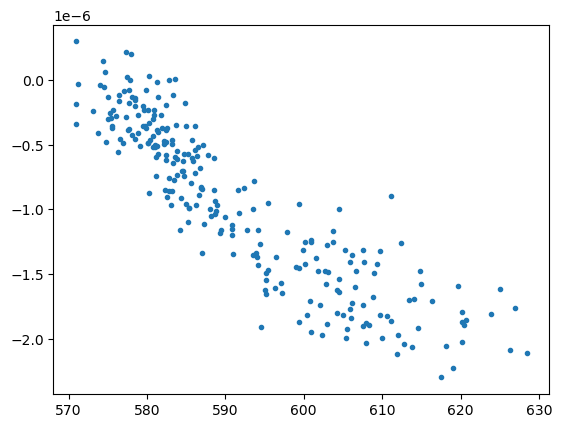

In [22]:
plt.plot(ds.SW.isel(ens=5),ds.NEE.isel(ens=5),'.')

In [17]:
fs

array(['/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_185001-186912.nc',
       '/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_187001-188912.nc',
       '/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_189001-190912.nc',
       '/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_191001-192912.nc',
       '/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_193001-194912.nc',
       '/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_195001-196912.nc',
       '/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_197001-198912.nc',
       '/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_199001-200912.nc',
       '/glade/scratch/djk2120/esgf/mpi12/nep_Emon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_201001-201412.nc',
       '/glade/scratch/djk21

In [16]:
la=xr.open_dataset('mpi_mask_grnlnd_antarc.nc').landarea
latrop=la*(abs(la.lat)<24)
vmap={'hurs':'RH2M','mrso':'SW','nbp':'NBP','pr':'PREC','tas':'TSA','tlai':'TLAI','nep':'NEE'}

f='r10i1p1f1.txt'
f = open(f, "r")
fs=np.array([f.strip() for f in f.readlines()])
vs=np.array([f.split('/')[-1].split('_')[0] for f in fs ])

cfs={'NBP':1000,'NEE':-1000}
units={'NBP':'gC/m2/s','NEE':'gC/m2/s'}


dvs=['nep','mrso']
das={vmap[v]:xr.open_mfdataset(fs[vs==v],combine='by_coords')[v] for v in dvs}

if ('TSA' in das)&('RH2M' in das):
    das['VPD'],das['VP']=calc_vpd(das['TSA'],das['RH2M'])

OSError: no files to open

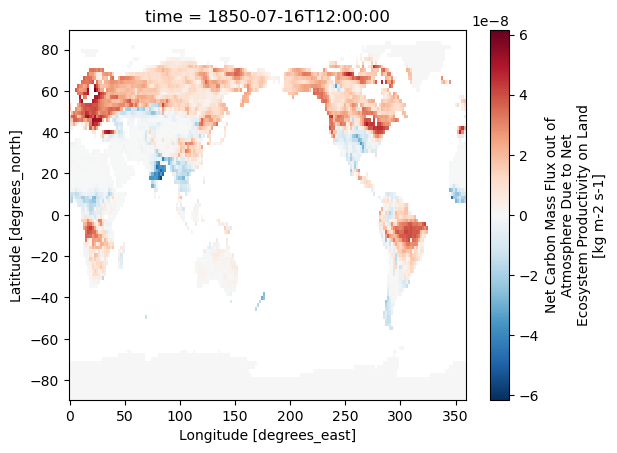

In [15]:
das['NEE'].isel(time=6).plot()

In [2]:
import numpy as np

In [7]:
lhc=[[0.25,0.25,0.25,0.25*np.ones(79)],
     [0.5,0.5,0.5,0.5*np.ones(79)],
     [0.75,0.75,0.75,0.75*np.ones(79)]]
lhc

[[0.25,
  0.25,
  0.25,
  array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
         0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
         0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
         0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
         0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
         0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
         0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
         0.25, 0.25])],
 [0.5,
  0.5,
  0.5,
  array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.

In [8]:
import xarray as xr
import numpy as np
import sys
from utils import *

la=xr.open_dataset('mask_grnlnd_antarc.nc').landarea
latrop=la*(abs(la.lat)<24)

f=sys.argv[1]
f = open(f, "r")
fs=np.array([f.strip() for f in f.readlines()])

dvs=['GPP','HR','AR','COL_FIRE_CLOSS','NPP','NEP','NBP',
          'FCTR','FCEV','FGEV','QRUNOFF','SOILWATER_10CM','TSA','RH2M',
          'TLAI','FSDS','RAIN','SNOW']

das={v:preprocess(xr.open_mfdataset([f.replace('NBP',v) for f in fs],combine='by_coords')[v]) for v in dvs}
p=das['RAIN']+das['SNOW']
p.attrs=das['RAIN'].attrs
p.attrs['long_name']='precipitation'
das['PREC']=p
das['VPD'],das['VP']=calc_vpd(das['TSA'],das['RH2M'])
das['SW']=get_sw(fs)

cfs={}
units={}

ds=xr.Dataset()
for v in das:
    if v in cfs:
        cf=cfs[v]
    else:
        cf=1

    da=das[v]
    x=cf*amean(da)
    ds[v]=gmean(x,la)
    ds[v+'_TROP']=gmean(x,latrop)
    
    attrs=da.attrs
    
    if v in units:
        attrs['units']=units[v]
        
    ds[v].attrs=attrs
    ds[v+'_TROP'].attrs=attrs
    
fout='/glade/scratch/djk2120/postp/twsnbp/cesm1.'+fs[0].split('.')[4]+'.postp.nc'
ds.to_netcdf(fout)

'/glade/scratch/djk2120/postp/twsnbp/cesm1.013.postp.nc'

In [12]:
fs[0]

'/glade/campaign/cesm/collections/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/monthly/NBP/b.e11.B20TRC5CNBDRD.f09_g16.013.clm2.h0.NBP.192001-200512.nc'

In [121]:
x=la.sum()*1e-9*ds.TWS.sel(year=slice(1976,1991))
y=24*60*60*365*la.sum()*1e-9*ds.NBP.sel(year=slice(1976,1991))

In [123]:
from scipy import stats

In [124]:
stats.linregress(x,y)

LinregressResult(slope=0.3633796722266397, intercept=-90.69683046689529, rvalue=0.5509518848722783, pvalue=0.026973973745398033, stderr=0.14710537422805028, intercept_stderr=37.05881547818621)

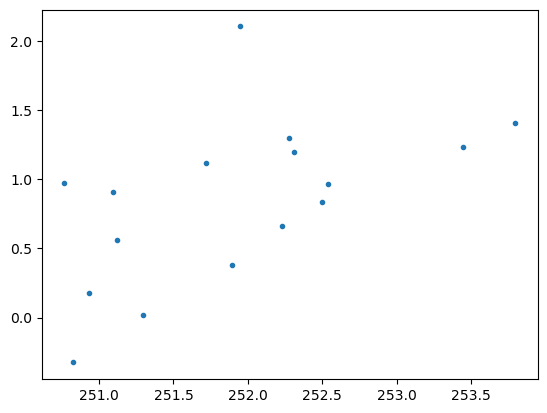

In [122]:
plt.plot(x,y,'.')

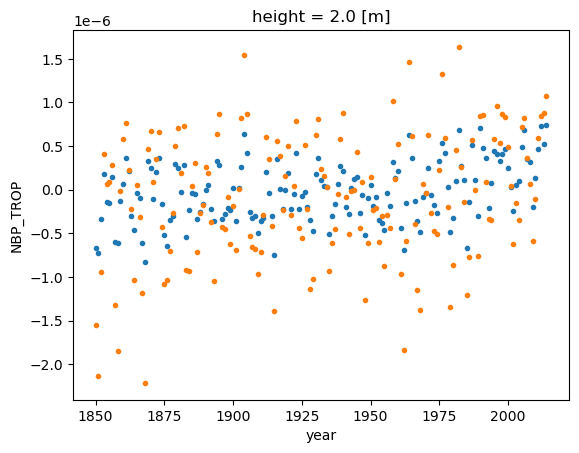

In [97]:
(ds['NBP']).plot.line('.')
(ds['NBP_TROP']).plot.line('.')

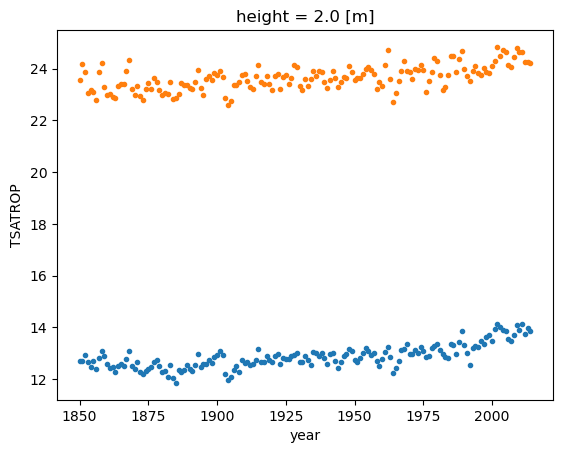

In [88]:
(ds['TSA']-273.14).plot.line('.')
(ds['TSATROP']-273.14).plot.line('.')

In [49]:
tsa=xr.open_mfdataset(fs[vs=='tas'],combine='by_coords')['tas']

In [45]:
rh2m=xr.open_mfdataset(fs[vs=='hurs'],combine='by_coords')['hurs']

In [60]:
vpd,vp=calc_vpd(tsa,rh2m)

In [71]:
ix=abs(tsa.lat)<24
latrop=la*ix

In [73]:
gmean(amean(vpd),latrop)

<xarray.DataArray 'VPD' (year: 165)>
array([1.45613253, 1.54872248, 1.4668591 , 1.35339922, 1.36847228,
       1.36464408, 1.31865486, 1.48246299, 1.53824708, 1.38775435,
       1.31992338, 1.32975032, 1.33536436, 1.34657034, 1.39720833,
       1.39245936, 1.4042909 , 1.48811702, 1.54150576, 1.36522891,
       1.35510987, 1.39508501, 1.33362258, 1.30463957, 1.4044365 ,
       1.44584506, 1.42463474, 1.44510608, 1.3924222 , 1.35824875,
       1.34088684, 1.3522391 , 1.32584442, 1.44284783, 1.38346519,
       1.35870814, 1.36200783, 1.42950034, 1.40733264, 1.38477528,
       1.37860036, 1.37688976, 1.43635704, 1.48515971, 1.3783191 ,
       1.33660126, 1.45324629, 1.44476283, 1.4183277 , 1.47572726,
       1.4511476 , 1.4839603 , 1.42762325, 1.31873897, 1.27639862,
       1.31206363, 1.42379312, 1.42980544, 1.45412561, 1.49134714,
       1.48072364, 1.44446959, 1.39458017, 1.39027307, 1.45996747,
       1.53514396, 1.40030718, 1.3783092 , 1.45341109, 1.42490175,
       1.3509983 , 1.46240387, 1.45672838, 1.36400916, 1.44798515,
       1.46462596, 1.35774539, 1.45260429, 1.52518828, 1.52648452,
       1.39287039, 1.37349354, 1.43282021, 1.3760733 , 1.42574351,
       1.46348648, 1.45498716, 1.47391856, 1.43784608, 1.38136477,
       1.34928659, 1.43711496, 1.47900189, 1.4411458 , 1.39325159,
       1.40099689, 1.45813184, 1.42826904, 1.5156848 , 1.47478879,
       1.43584694, 1.43045905, 1.44338171, 1.4696692 , 1.49109634,
       1.51279122, 1.48367443, 1.45949364, 1.34913516, 1.40385273,
       1.37640554, 1.48586113, 1.60228532, 1.42584806, 1.26781167,
       1.35385534, 1.41719866, 1.4694099 , 1.53095368, 1.47021307,
       1.46106949, 1.41407354, 1.48011365, 1.4814881 , 1.50873539,
       1.48545221, 1.34179053, 1.39661596, 1.45977494, 1.54410418,
       1.52670795, 1.44469421, 1.33624241, 1.37462801, 1.44495592,
       1.54921434, 1.55328406, 1.4384972 , 1.52208148, 1.57881886,
       1.45826343, 1.42534582, 1.44888973, 1.46531377, 1.50185798,
       1.41597476, 1.41347338, 1.44677289, 1.42845966, 1.41526128,
       1.45798616, 1.51815824, 1.55520971, 1.51293954, 1.54713865,
       1.54524178, 1.48193465, 1.45230697, 1.52527468, 1.58194862,
       1.51118016, 1.54548048, 1.47457852, 1.48391888, 1.45184927])
Coordinates:
    height   float64 2.0
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
Attributes:
    long_name:  2m vapor pressure deficit
    units:      kPa

<xarray.DataArray ()>
array(50451938.08090293)
Coordinates:
    height   float64 2.0

In [59]:
def calc_vpd(tsa,rh2m):
    t=tsa-273.15
    esat=0.61094*np.exp(17.625*t/(t+234.04)).compute()
    vpd=(esat*(1-rh2m/100)).compute()
    vpd.name='VPD'
    vpd.attrs={'long_name':'2m vapor pressure deficit','units':'kPa'}
    vp=(esat*rh2m/100).compute()
    vp.name='VP'
    vp.attrs={'long_name':'2m vapor pressure','units':'kPa'}
    
    return [vpd,vp]

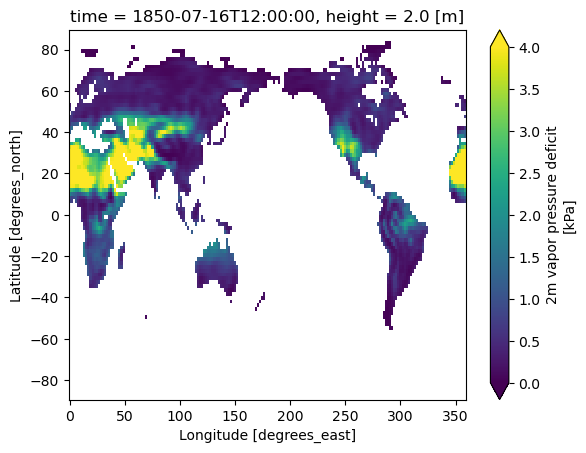

In [57]:
vpd.where(la>0).isel(time=6).plot(vmin=0,vmax=4)

In [42]:

def get_vpd(rh2m,tsa):

    t=tsa-273.15
    esat=0.61094*np.exp(17.625*t/(t+234.04)).compute()
    vpd=(esat*(1-rh2m/100)).compute()
    vpd.name='VPD'
    vpd.attrs={'long_name':'2m vapor pressure deficit','units':'kPa'}
    vp=(esat*rh2m/100).compute()
    vp.name='VP'
    vp.attrs={'long_name':'2m vapor pressure','units':'kPa'}

    out={'RH2M':rh2m,'TSA':tsa,'VPD':vpd,'VP':vp}
    
    return out

In [24]:
v='hurs'
da=xr.open_mfdataset(fs[vs==v],combine='by_coords')[v]
da

<xarray.DataArray 'hurs' (time: 1980, lat: 96, lon: 192)>
dask.array<concatenate, shape=(1980, 96, 192), dtype=float32, chunksize=(240, 96, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0
Attributes:
    standard_name:   relative_humidity
    long_name:       Near-Surface Relative Humidity
    comment:         The relative humidity with respect to liquid water for T...
    units:           %
    original_units:  1
    history:         2021-10-14T06:48:18Z altered by CMOR: Converted units fr...
    cell_methods:    area: time: mean
    cell_measures:   area: areacella

In [22]:
da

<xarray.DataArray 'mrso' (time: 1980, lat: 96, lon: 192)>
dask.array<concatenate, shape=(1980, 96, 192), dtype=float32, chunksize=(240, 96, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  mass_content_of_water_in_soil
    long_name:      Total Soil Moisture Content
    comment:        the mass per unit area  (summed over all soil layers) of ...
    units:          kg m-2
    original_name:  mrso
    cell_methods:   area: mean where land time: mean
    cell_measures:  area: areacella
    history:        2021-10-14T06:52:57Z altered by CMOR: replaced missing va...